采用了tensorflow提供的结合softmax的交叉熵损失函数定义方法,即
tf.nn.softmax_cross_entropy_with_logits(logits=,labels=)
解决了nan值问题

模型说明：
双隐层，神经元个数分别为256和128个
lr=0.05，epochs=50，batchsize=100

模型结果：
loss_train=0.3095 acc_train=0.9190
loss_val=0.5490 acc_val=0.9042
loss_test=0.4569 acc_test=0.9072
显然，该模型的准确率还有待提高！（是从层数入手呢还是从每层的神经元个数入手呢？学习率要不要改呢？）

⚠️先不考虑超参数问题，在本模型中初始化w服从的是正态分布，即w=tf.Variable(tf.random_normal([first,second]))

🥚如果仅仅把w改成服从截断正态分布，模型的准确率明显提高了！
w=tf.Variable(tf.truncated_normal([first,second],stddev=0.1))

😺所以我们以后采取截断正态分布初始化w！！！

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets('MNIST_data/',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
x=tf.placeholder(tf.float32,shape=[None,784],name='X')
y=tf.placeholder(tf.float32,shape=[None,10],name='Y')

In [3]:
def layer(Input,first,second,activation=None):
    w=tf.Variable(tf.random_normal([first,second]))
    b=tf.Variable(tf.zeros(second))
    if activation=='relu':
        output=tf.nn.relu(tf.matmul(Input,w)+b) 
    else:
        output=tf.matmul(Input,w)+b
    return output

In [4]:
units1=256
units2=128

lr=0.05
epochs=50
batchsize=100

iterations=int(mnist.train.num_examples/batchsize)

In [5]:
output1=layer(x,784,units1,'relu')  #(None,units1)
output2=layer(output1,units1,units2,'relu') #(None,units2)

output=layer(output2,units2,10)  #(None,10)
prop=tf.nn.softmax(output)

pred=tf.argmax(prop,axis=1) #(None,)

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
loss_function=tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits=output,labels=y)) #()
comparison=tf.cast(tf.equal(pred,tf.argmax(y,axis=1)),dtype=tf.float32)  #(None,)
accuracy=tf.reduce_mean(comparison) #()


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [7]:
optimizer=tf.train.GradientDescentOptimizer(lr).minimize(loss_function)

In [8]:
from time import time
start=time()

In [9]:
sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)

In [10]:
for epoch in range(epochs):
    for iteration in range(iterations):
        xs,ys=mnist.train.next_batch(batchsize)
        sess.run(optimizer,feed_dict={x:xs,y:ys})
    loss_val,acc_val=sess.run([loss_function,accuracy],feed_dict={x:mnist.validation.images,y:mnist.validation.labels})
    print ('when epoch=%d'%epoch,'loss_val=%.4f'%loss_val,'acc_val=%.4f'%acc_val)
    

when epoch=0 loss_val=2.0622 acc_val=0.3262
when epoch=1 loss_val=1.6587 acc_val=0.4382
when epoch=2 loss_val=1.5545 acc_val=0.5348
when epoch=3 loss_val=1.5222 acc_val=0.5540
when epoch=4 loss_val=1.2694 acc_val=0.6204
when epoch=5 loss_val=1.1606 acc_val=0.6846
when epoch=6 loss_val=1.0746 acc_val=0.7152
when epoch=7 loss_val=0.9767 acc_val=0.7552
when epoch=8 loss_val=1.0440 acc_val=0.7302
when epoch=9 loss_val=0.9793 acc_val=0.7564
when epoch=10 loss_val=0.8978 acc_val=0.7930
when epoch=11 loss_val=0.8405 acc_val=0.8182
when epoch=12 loss_val=0.8471 acc_val=0.8310
when epoch=13 loss_val=0.8152 acc_val=0.8372
when epoch=14 loss_val=0.7821 acc_val=0.8362
when epoch=15 loss_val=0.8289 acc_val=0.8472
when epoch=16 loss_val=0.7292 acc_val=0.8436
when epoch=17 loss_val=0.7451 acc_val=0.8594
when epoch=18 loss_val=0.7328 acc_val=0.8600
when epoch=19 loss_val=0.6802 acc_val=0.8688
when epoch=20 loss_val=0.7157 acc_val=0.8704
when epoch=21 loss_val=0.7927 acc_val=0.8612
when epoch=22 loss_v

In [11]:
duration=time()-start
print ('训练时间：%.2f秒'%duration)

训练时间：825.54秒


In [12]:
loss_train,acc_train=sess.run([loss_function,accuracy],feed_dict={x:mnist.train.images,y:mnist.train.labels})
print ('loss_train=%.4f'%loss_train,'acc_train=%.4f'%acc_train)
loss_val,acc_val=sess.run([loss_function,accuracy],feed_dict={x:mnist.validation.images,y:mnist.validation.labels})
print ('loss_val=%.4f'%loss_val,'acc_val=%.4f'%acc_val)
loss_test,acc_test=sess.run([loss_function,accuracy],feed_dict={x:mnist.test.images,y:mnist.test.labels})
print ('loss_test=%.4f'%loss_test,'acc_test=%.4f'%acc_test)

loss_train=0.3095 acc_train=0.9190
loss_val=0.5490 acc_val=0.9042
loss_test=0.4569 acc_test=0.9072


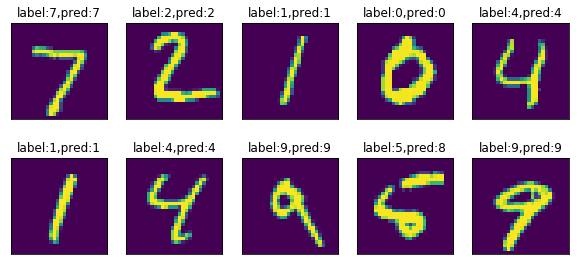

In [13]:
import matplotlib.pyplot as plt 
%matplotlib inline

def plot_images_labels(imgs,labels,preds,index=0,num=10):
    fig=plt.figure(figsize=(10,12))
    for i in range(num):
        plt.subplot(5,5,i+1)
        plt.imshow(imgs[index+i].reshape(28,28)) #cmap='binary'
        plt.title('label:{},pred:{}'.format(labels[i],preds[i]),fontsize=12)
        plt.xticks([])
        plt.yticks([])
    plt.show()

label_test=sess.run(tf.argmax(y,axis=1),feed_dict={y:mnist.test.labels})
pred_test=sess.run(pred,feed_dict={x:mnist.test.images})

plot_images_labels(mnist.test.images,label_test,pred_test)